In [44]:
"""
# run only if needed
%pip install numpy
%pip install pandas
%pip install matplotlib
"""

'\n# run only if needed\n%pip install numpy\n%pip install pandas\n%pip install matplotlib\n'

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# import data from calibrated stars text file
calStars = pd.read_csv('..\Data\Camera Images\calibrated star data.txt',delimiter=' ')
calStarNames = calStars['Name']

To set up the color-color diagram, we first want to set up a magnitude system. In our universe, apparent magnitudes are given by $$m_1 - m_0 = -2.5 \log \frac{I_1}{I_0},$$ for reference magnitude and intensity $m_0,I_0$. I will choose to ignore the scaling factor $-2.5$ and the rescaling, so that we have apparent magnitude $$ m = - \log I.$$

First, we filter for parallaxes $>$ parallaxLimit (tentatively 0.01).

In [46]:
parallaxLimit = 0.01

filtStars = calStars.loc[calStars['Parallax'] > parallaxLimit]
filtStarNames = np.array(filtStars['Name']) # names for identification
filtStarBlue = np.array(filtStars['BlueFlux']) # blue flux
filtStarGreen = np.array(filtStars['GreenFlux']) # green flux
filtStarRed = np.array(filtStars['RedFlux']) # red flux
filtStarDists = np.array(filtStars['Distance']) # distances

filtStarColor = np.log(filtStarRed) - np.log(filtStarBlue)

# define function to convert from apparent to absolute magnitude.
def appToAbs(m,d):
    return m + 2*np.log(d) 

filtStarGreenAMags = appToAbs(np.log(filtStarGreen), filtStarDists)


The following tells us how many stars have been excluded by the condition that parallax $>$ parallaxLimit

In [47]:
print(len(calStarNames))
print(len(filtStarNames))

3011
246


We now plot and save the HR diagram.

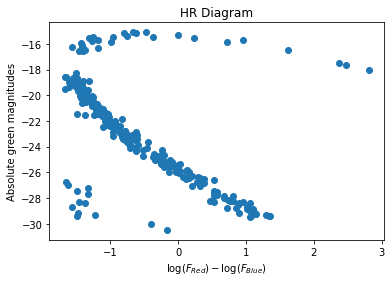

In [48]:
fig, ax = plt.subplots(1,1)
ax.scatter(filtStarColor, filtStarGreenAMags)

ax.set_title('HR Diagram')
ax.set_ylabel('Absolute green magnitudes')
ax.set_xlabel('$\log(F_{Red}) - \log(F_{Blue})$')

fig.show()
fig.savefig('HRDiagram.png')